In [2]:
#pandas
import pandas as pd 

#tensorflow
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns 

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#regular expression
import re

In [4]:
df = pd.read_csv(r'C:\Users\aanki\Desktop\Self Project_ML\SMS_Spam_data.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape 

(5572, 2)

In [8]:
df.isnull().sum()


label    0
text     0
dtype: int64

In [9]:
X = df.drop('label',axis=1)
y = df.label

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
voc_size = 3000


In [12]:
messages = X.copy()


In [13]:
messages.reset_index(inplace=True)
messages.head()

,index,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,U dun say so early hor... U c already then say...
4,4,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aanki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
ps = PorterStemmer()

corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [17]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]


In [18]:
corpus[0]


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [19]:
onehot_repr[0]


[645,
 1707,
 808,
 2572,
 2115,
 163,
 308,
 2282,
 691,
 1942,
 2744,
 2326,
 2193,
 1821,
 2672,
 2959]

In [20]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1821 2672 2959]
 [   0    0    0 ... 2350 1467 2393]
 [2096  423 1573 ... 1243 2383  194]
 ...
 [   0    0    0 ... 1699  960   70]
 [   0    0    0 ... 2180  153  949]
 [   0    0    0 ... 1637 1521 2579]]


In [21]:
embedding_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            120000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 176,501
Trainable params: 176,501
Non-trainable params: 0
_________________________________________________________________


In [23]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [24]:
X_final.shape,y_final.shape

((5572, 20), (5572,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
59/59 [==============================] - 4s 29ms/step - loss: 0.3417 - accuracy: 0.8784 - val_loss: 0.1701 - val_accuracy: 0.9434
Epoch 2/10
59/59 [==============================] - 1s 20ms/step - loss: 0.0987 - accuracy: 0.9737 - val_loss: 0.0778 - val_accuracy: 0.9821
Epoch 3/10
59/59 [==============================] - 1s 22ms/step - loss: 0.0388 - accuracy: 0.9871 - val_loss: 0.0618 - val_accuracy: 0.9837
Epoch 4/10
59/59 [==============================] - 1s 21ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0578 - val_accuracy: 0.9826
Epoch 5/10
59/59 [==============================] - 1s 24ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0674 - val_accuracy: 0.9826
Epoch 6/10
59/59 [==============================] - 2s 27ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0933 - val_accuracy: 0.9831
Epoch 7/10
59/59 [==============================] - 1s 22ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0790 - val_accuracy: 0.9821
Epoch 8/10
59

In [27]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

58/58 [==============================] - 1s 5ms/step


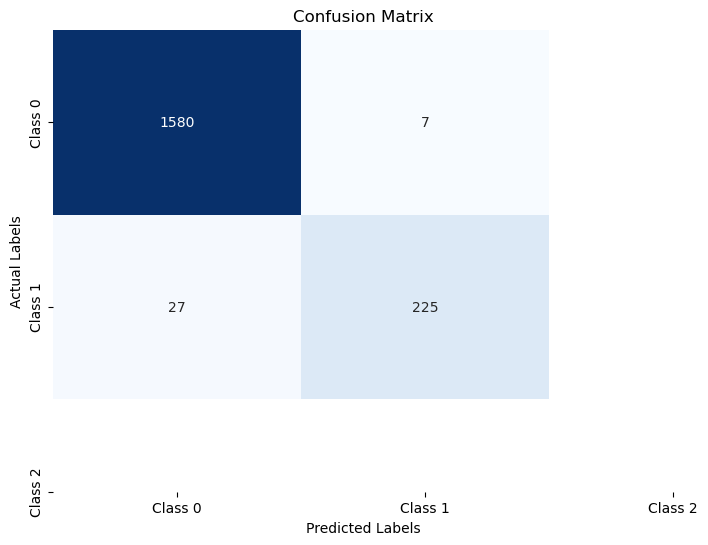

In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.89      0.93       252

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [30]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9815116911364872


In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Create a pipeline with RandomForestClassifier
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can adjust n_estimators as needed
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

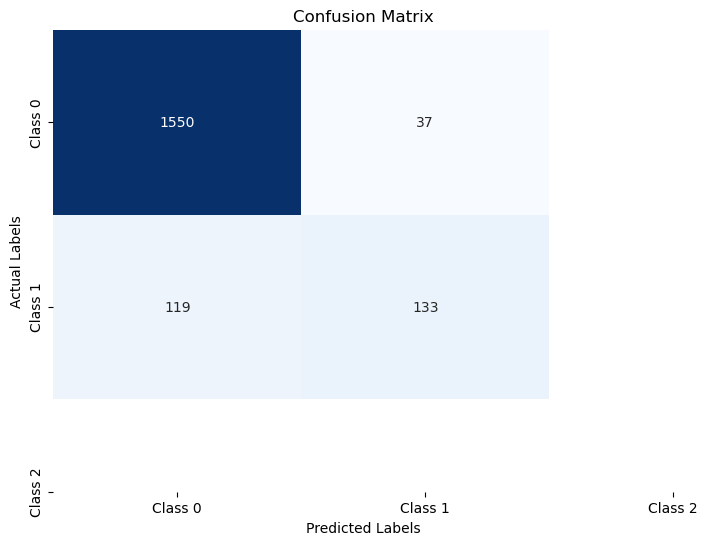

In [33]:
# Predict on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [34]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1587
           1       0.78      0.53      0.63       252

    accuracy                           0.92      1839
   macro avg       0.86      0.75      0.79      1839
weighted avg       0.91      0.92      0.91      1839



In [35]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf))

Accuracy Score: 0.9151712887438825


In [36]:

pipeline_rf1 = Pipeline([
    ('classifier', MultinomialNB ())  # You can adjust n_estimators as needed
])

In [37]:
# Fit the pipeline on the training data
pipeline_rf1.fit(X_train, y_train)

Pipeline(steps=[('classifier', MultinomialNB())])

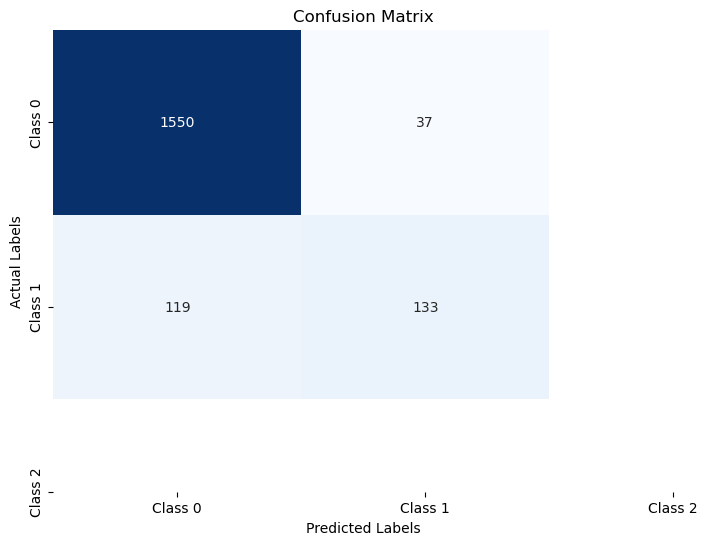

In [38]:
# Predict on the test data
y_pred_rf1 = pipeline_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1587
           1       0.78      0.53      0.63       252

    accuracy                           0.92      1839
   macro avg       0.86      0.75      0.79      1839
weighted avg       0.91      0.92      0.91      1839



In [40]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf1))

Accuracy Score: 0.9151712887438825


In [41]:
pipeline_rf2 = Pipeline([
    ('classifier',LogisticRegression())
])

In [42]:
pipeline_rf2.fit(X_train, y_train)

Pipeline(steps=[('classifier', LogisticRegression())])

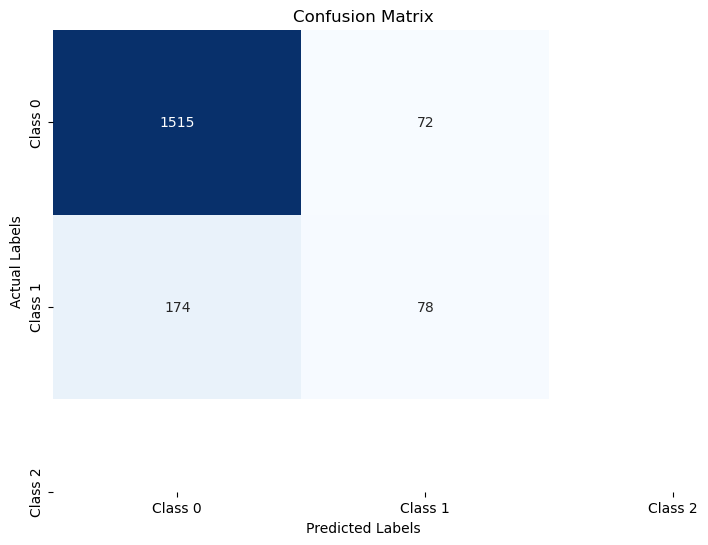

Accuracy Score: 0.866231647634584


In [43]:
y_pred_rf2 = pipeline_rf2.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf2))

In [44]:
print(classification_report(y_test,y_pred_rf2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1587
           1       0.52      0.31      0.39       252

    accuracy                           0.87      1839
   macro avg       0.71      0.63      0.66      1839
weighted avg       0.85      0.87      0.85      1839



In [45]:
pipeline_rf3 = Pipeline([
    ('classifier',SVC())
])

In [46]:
pipeline_rf3.fit(X_train, y_train)

Pipeline(steps=[('classifier', SVC())])

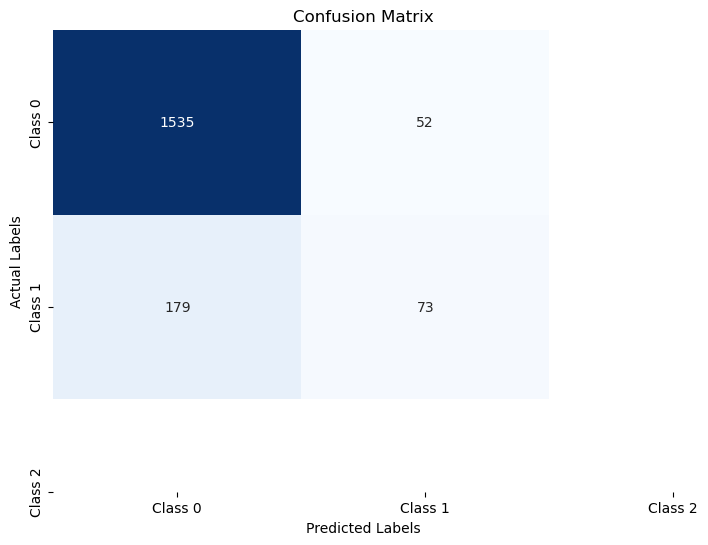

Accuracy Score: 0.8743882544861338


In [47]:
y_pred_rf3 = pipeline_rf3.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf3))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import string 
def text_process(messages):
    nopunc = [char for char in messages if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [49]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)

In [50]:
bow_transformer.fit(messages['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 11304


In [51]:
bow_reviews = bow_transformer.transform(messages['text'])

In [52]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)


In [53]:
review_train, review_test, label_train, label_test = train_test_split(df['text'],df['label'],test_size=0.35)

In [54]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [55]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [56]:
predictions = pipeline.predict(review_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [57]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1699
        spam       1.00      0.74      0.85       252

    accuracy                           0.97      1951
   macro avg       0.98      0.87      0.92      1951
weighted avg       0.97      0.97      0.96      1951

Confusion Matrix: [[1699    0]
 [  66  186]]
Accuracy Score: 0.9661711942593542


In [58]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 96.62%


In [59]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [60]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [61]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [62]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1699
        spam       0.99      0.79      0.88       252

    accuracy                           0.97      1951
   macro avg       0.98      0.89      0.93      1951
weighted avg       0.97      0.97      0.97      1951

Confusion Matrix: [[1697    2]
 [  54  198]]
Accuracy Score: 0.9712967708867247
Model Prediction Accuracy: 97.13%


In [63]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [64]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [65]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [66]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1699
        spam       0.88      0.79      0.83       252

    accuracy                           0.96      1951
   macro avg       0.93      0.89      0.91      1951
weighted avg       0.96      0.96      0.96      1951

Confusion Matrix: [[1673   26]
 [  53  199]]
Accuracy Score: 0.9595079446437724
Model Prediction Accuracy: 95.95%


In [67]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [68]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [69]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [70]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1699
        spam       1.00      0.39      0.56       252

    accuracy                           0.92      1951
   macro avg       0.96      0.70      0.76      1951
weighted avg       0.93      0.92      0.91      1951

Confusion Matrix: [[1699    0]
 [ 153   99]]
Accuracy Score: 0.9215786776012301
Model Prediction Accuracy: 92.16%


In [71]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [72]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [73]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [74]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1699
        spam       0.99      0.79      0.88       252

    accuracy                           0.97      1951
   macro avg       0.98      0.89      0.93      1951
weighted avg       0.97      0.97      0.97      1951

Confusion Matrix: [[1698    1]
 [  54  198]]
Accuracy Score: 0.9718093285494618
Model Prediction Accuracy: 97.18%


In [75]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [76]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BCEC5C8D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [77]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [78]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1699
        spam       1.00      0.60      0.75       252

    accuracy                           0.95      1951
   macro avg       0.97      0.80      0.86      1951
weighted avg       0.95      0.95      0.94      1951

Confusion Matrix: [[1699    0]
 [ 101  151]]
Accuracy Score: 0.9482316760635572
Model Prediction Accuracy: 94.82%


In [79]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 94.82%
K Nearest Neighbors Prediction Accuracy: 92.16%
Decision Tree Classifier Prediction Accuracy: 95.95%
Random Forests Classifier Prediction Accuracy: 97.13%
Support Vector Machines Prediction Accuracy: 97.18%
Multinomial Naive Bayes Prediction Accuracy: 96.62%
